In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df=pd.read_csv('KarawngMei.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
print(df.shape)
df.head()

(30, 1)


,VOLUME
DATE,
2023-04-01,5.898559e+11
2023-04-02,1.393840e+12
2023-04-03,6.741405e+11
2023-04-04,1.136429e+12
2023-04-05,1.112963e+12


ACF & PACF

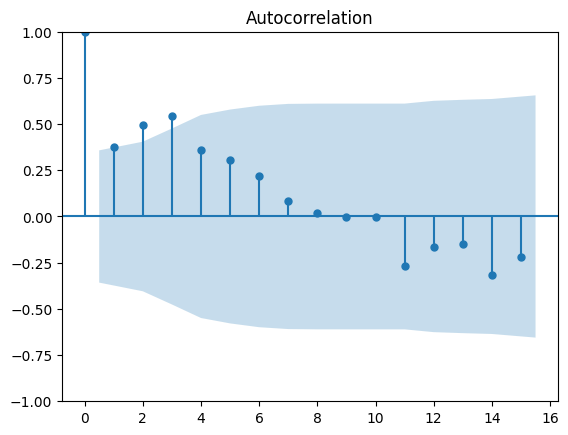

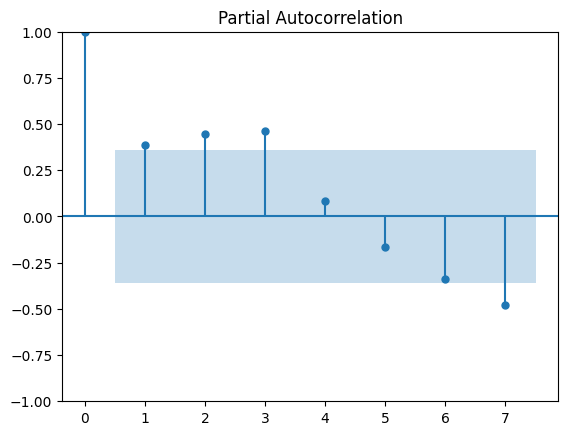

In [84]:
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


#plot autocorrelation function
fig = tsaplots.plot_acf(df)
plt.show()

#plot partial autocorrelation function (FIX THE LAGS)
fig = tsaplots.plot_pacf(df['VOLUME'], lags=7)
plt.show()

<Axes: xlabel='DATE'>

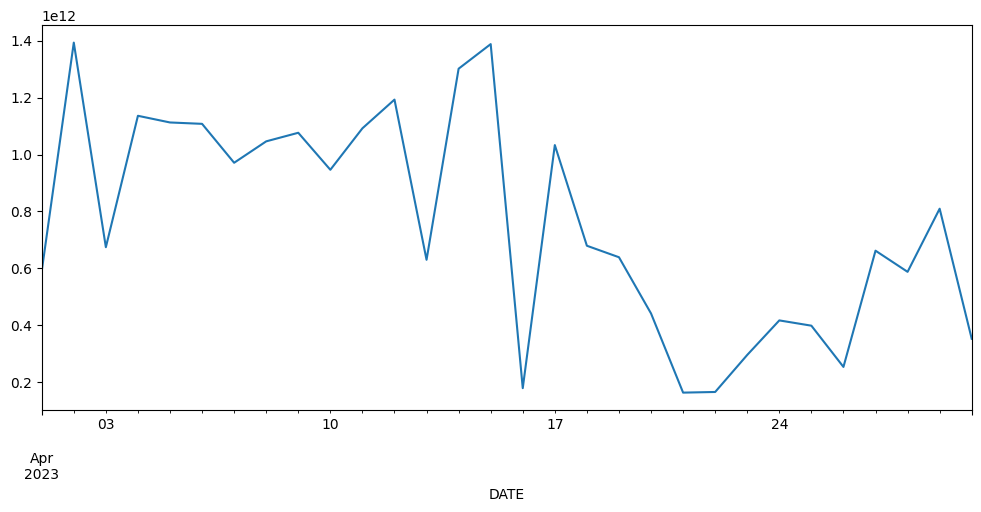

In [47]:
df['VOLUME'].plot(figsize=(12,5))

In [72]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value : ", dftest[2])
    print("3. Num Of Lags :", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critcal Values : ")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
adf_test(df)

1. ADF:  -0.9641451853040517
2. P-Value :  2
3. Num Of Lags : 2
4. Num Of Observations Used For ADF Regression: 27
5. Critcal Values : 
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


In [75]:
df['DIFFERENCE'] = df['VOLUME'].diff()
df = df.dropna()
print(df)

                  VOLUME    DIFFERENCE
DATE                                  
2023-04-02  1.393840e+12  8.039837e+11
2023-04-03  6.741405e+11 -7.196991e+11
2023-04-04  1.136429e+12  4.622890e+11
2023-04-05  1.112963e+12 -2.346681e+10
2023-04-06  1.108114e+12 -4.849054e+09
2023-04-07  9.712096e+11 -1.369040e+11
2023-04-08  1.046534e+12  7.532473e+10
2023-04-09  1.076719e+12  3.018461e+10
2023-04-10  9.465019e+11 -1.302171e+11
2023-04-11  1.092377e+12  1.458747e+11
2023-04-12  1.193357e+12  1.009800e+11
2023-04-13  6.298570e+11 -5.634996e+11
2023-04-14  1.302088e+12  6.722308e+11
2023-04-15  1.388624e+12  8.653608e+10
2023-04-16  1.783311e+11 -1.210293e+12
2023-04-17  1.033457e+12  8.551259e+11
2023-04-18  6.792925e+11 -3.541644e+11
2023-04-19  6.388728e+11 -4.041970e+10
2023-04-20  4.410899e+11 -1.977829e+11
2023-04-21  1.626229e+11 -2.784670e+11
2023-04-22  1.648730e+11  2.250140e+09
2023-04-23  2.952383e+11  1.303653e+11
2023-04-24  4.166581e+11  1.214198e+11
2023-04-25  3.981080e+11 

In [76]:
df_dif = pd.DataFrame(df)
df = df.drop('VOLUME', axis=1)
df = df.rename(columns={'DIFFERENCE': 'VOLUME'})
df

,VOLUME
DATE,
2023-04-02,8.039837e+11
2023-04-03,-7.196991e+11
2023-04-04,4.622890e+11
2023-04-05,-2.346681e+10
2023-04-06,-4.849054e+09
2023-04-07,-1.369040e+11
2023-04-08,7.532473e+10
2023-04-09,3.018461e+10
2023-04-10,-1.302171e+11


In [77]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value : ", dftest[2])
    print("3. Num Of Lags :", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critcal Values : ")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
adf_test(df)

1. ADF:  -7.217737014291421
2. P-Value :  1
3. Num Of Lags : 1
4. Num Of Observations Used For ADF Regression: 27
5. Critcal Values : 
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


## **ARIMA**

In [ ]:
#membuat test dataset
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

In [92]:
from pmdarima import auto_arima
arima = auto_arima(df, start_p=0, start_q=0,
                           seasonal=False, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

arima.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1638.787, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1636.148, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1635.480, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1636.814, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1636.076, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1630.837, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1632.123, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1628.432, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1629.178, Time=0.55 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1626.309, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1626.929, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1626.964, Time=0.55 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -809.154
Date:                Sun, 25 Jun 2023   AIC                           1626.309
Time:                        20:07:50   BIC                           1631.778
Sample:                    04-01-2023   HQIC                          1628.022
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7294      0.292     -2.502      0.012      -1.301      -0.158
ma.L2          0.3749      0.380      0.986      0.324      -0.370       1.120
ma.L3          0.4572      0.212      2.154      0.031       0.041       0.873
sigma2      1.008e+23        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.34   Prob(JB):                         0.21
Heteroskedasticity (H):               0.59   Skew:                             0.23
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.53e+62. Standard errors may be unstable.
"""

In [ ]:
print(df.shape)
train_sarima=df.iloc[:-30]
test_sarima=df.iloc[-30:]
print(train_sarima.shape,test_sarima.shape)

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred_arima=pd.DataFrame(pred)
pred_arima=pd.concat([df,pred],axis=1)
pred_arima

## **SARIMA**

In [94]:
from pmdarima import auto_arima
sarima = auto_arima(df, start_p=0,start_q=2,max_p=5,max_q=5,m=7,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=1633.699, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1638.787, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1637.731, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1636.806, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1636.814, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=1631.918, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1630.837, Time=0.22 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=1631.741, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1635.480, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1632.123, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=1628.432, Time=0.20 sec
 ARIMA(0,1,3)(1,0,0)[7] intercept   : AIC=1630.213, Time=0.48 sec
 ARIMA(0,1,3)(0,0,1)[7] intercept   : AIC=1630.012, Time=0.72 sec
 ARIMA(0,1,3)(1,0,1)[7] intercept   : AIC=1631.579, Time=0.91 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -809.154
Date:                Sun, 25 Jun 2023   AIC                           1626.309
Time:                        20:14:58   BIC                           1631.778
Sample:                    04-01-2023   HQIC                          1628.022
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7294      0.292     -2.502      0.012      -1.301      -0.158
ma.L2          0.3749      0.380      0.986      0.324      -0.370       1.120
ma.L3          0.4572      0.212      2.154      0.031       0.041       0.873
sigma2      1.008e+23        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.34   Prob(JB):                         0.21
Heteroskedasticity (H):               0.59   Skew:                             0.23
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.53e+62. Standard errors may be unstable.
"""